# Python para Data Science: trabalhando com funções, estruturas de dados e exceções

## 01. Bibliotecas

### Importando bibliotecas

In [1]:
import matplotlib
matplotlib.__version__

'3.10.3'

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
plt.show()

In [4]:
np.__version__

'2.2.6'

### Utilizando pacotes/bibliotecas

In [5]:
estudantes = ['João', 'Maria', 'José']
notas = [8.5, 9.0, 6.5]

<BarContainer object of 3 artists>

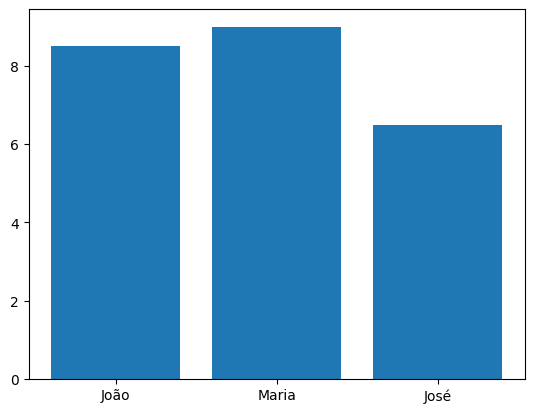

In [6]:
plt.bar(x=estudantes, height=notas)

In [7]:
estudantes_2 = ['João', 'Maria', 'José', 'Ana']

In [8]:
from random import choice

In [9]:
help(choice)

Help on method choice in module random:

choice(seq) method of random.Random instance
    Choose a random element from a non-empty sequence.



In [10]:
estudante = choice(estudantes_2)
estudante

'Maria'

### Para saber mais: outras formas de importação

Já trabalhamos com duas formas de importação de pacotes: o `import nome_biblioteca` para todo o pacote; e o `from nome_biblioteca import metodo` para apenas um método de uma dada biblioteca.

A importação de métodos específicos de uma biblioteca pode trazer algumas vantagens para o nosso projeto, como:

- **Maior clareza no código**: importar apenas os métodos que vamos usar torna o código mais claro e fácil de entender.
- **Redução de conflitos de nome**: quando importamos uma biblioteca inteira, podemos acabar tendo conflitos de nome com outras variáveis ou funções em nosso código.

Além de formas vistas anteriormente, podemos citar mais dois exemplos que podemos encontrar ao longo de suas práticas e estudos da liguagem Python:

#### `from nome_biblioteca import met_1, met_2`

Este código resulta na importação de 2 ou mais métodos de uma biblioteca, não necessitando repetir a importação desta a cada método desejado. Podemos por exemplo, importar 2 métodos da biblioteca *random* para colher uma amostra de 5 valores de uma lista de 20 valores gerada aleatoriamente com números de 0 a 99.

```python
from random import randrange, sample

lista = []
for i in range(20):
    lista.append(randrange(100))
sample(lista, 5)
```
> [28, 66, 53, 81, 85]

#### `from nome_biblioteca import *`

Esta forma é utilizada para importar todos os métodos de uma dada biblioteca. A diferença desta para o `import nome_biblioteca` é que, neste caso, não precisamos usar o nome da biblioteca para chamar o método. Podemos passar apenas o nome dele. Por exemplo, se formos calcular a raiz quadrada de certo número poderíamos seguir por uma das duas formas:

##### Usando `import nome_biblioteca`

```python
import math

n = int(input("Digite um número positivo para calcular sua raiz quadrada:"))
print(f"\nA raiz quadrada de {n} é igual a {math.sqrt(n)}")
```

##### Usando `from nome_biblioteca import *`

```python
from math import *

n = int(input("Digite um número positivo para calcular sua raiz quadrada:"))
print(f"\nA raiz quadrada de {n} é igual a {sqrt(n)}")
```

Note que, no segundo exemplo, suprimimos o nome `math` utilizando o método desejado e escrevendo o código com menos caracteres.

> **Atenção**: A importação nesse sentido precisa de alguns cuidados:
> - Podemos ter choque de nomes entre as variáveis. Por exemplo: no caso de termos uma função chamada `sqrt` antes de importar a da biblioteca `math`.
> - Não fica explícito de onde aquela variável, método ou classe veio.

## 02. Funções

### Built-in function

In [11]:
notas = {'1º Trimestre': 8.5, '2º Trimestre': 9.5, '3º Trimestre': 7.0}
notas

{'1º Trimestre': 8.5, '2º Trimestre': 9.5, '3º Trimestre': 7.0}

In [12]:
soma = 0
for nota in notas.values():
    soma += nota
soma

25.0

In [13]:
somatorio = sum(notas.values())
somatorio

25.0

In [14]:
qtd_notas = len(notas)
qtd_notas

3

In [15]:
media = somatorio / qtd_notas
media

8.333333333333334

In [16]:
round?

Signature: round(number, ndigits=None)
Docstring:
Round a number to a given precision in decimal digits.

The return value is an integer if ndigits is omitted or None.  Otherwise
the return value has the same type as the number.  ndigits may be negative.
Type:      builtin_function_or_method

In [17]:
media = round(media, 1)
media

8.3

### Criando funções

In [18]:
def media() -> None:
    calculo = (10 + 9 + 8) / 3
    print(calculo)

In [19]:
media()

9.0


In [20]:
def media(*args) -> None:
    calculo = sum(args) / len(args)
    print(calculo)

In [21]:
media(3, 6, 9)

6.0


In [22]:
notas = [8.5, 9.0, 6.0, 10.0]

In [23]:
media(*notas)

8.375


In [24]:
resultado = media(*notas)

8.375


In [25]:
resultado

In [26]:
type(resultado)

NoneType

### Para saber mais: escopo de uma variável

Em Python, o escopo de uma variável é definido pela região do código onde ela pode ser acessada. No caso de uma função, o escopo pode ser dividido em duas categorias: **escopo global** e **escopo local**.

O escopo global é o espaço no qual uma variável pode ser acessada por qualquer função ou código que esteja sendo executado no programa. Já o escopo local é o espaço no qual a variável pode ser acessada apenas pela função em que foi definida.

O problema de escopo ocorre quando uma variável é definida dentro do escopo de uma função e, em seguida, é referenciada fora do escopo da função. Nesse caso, o Python gera uma mensagem de erro, indicando que a variável não foi definida (`NameError`).

Abaixo segue um exemplo que ilustra esse comportamento. Inicialmente, vamos criar uma variável `x` externa a função `soma()`, na qual definimos uma outra variável y e, por fim, imprimimos a soma das duas variáveis.

```python
x = 7

def soma():
  y = 9
  print(x + y)
```

Note que o `x` é a nossa variável definida no escopo global e o `y` a variável definida no escopo local da função `soma()`. Quando tentamos executar a nossa função, a soma é realizada normalmente:

```python
soma()
```
> 16

No entanto, o Python gera um erro quando tentamos imprimir a soma de `x` e `y` fora do escopo da função, pois a variável `y` existe apenas dentro da função `soma()`.

```python
print(x + y)
```
> ---------------------------------------------------------------------------
>
> NameError                                 Traceback (most recent call last)
> <ipython-input-4-f09a7b03ddbf> in <module>
> ----> 1 print(x + y)
>
> NameError: name 'y' is not defined


Para corrigir esse erro, podemos tornar `y` uma variável global ou retornar seu valor na função e atribuí-lo a uma variável externa. No próximo vídeo, vamos aprender como proceder nesse tipo de situação.

### Funções com retorno

In [42]:
def media(lista: list[int | float]) -> float:
    return sum(lista) / len(lista)

In [44]:
resultado = media(notas)
resultado

8.375

In [45]:
def boletim(lista: list[int | float]) -> tuple[float, str]:
    media = sum(lista) / len(lista)

    if media >= 6:
        situacao = 'Aprovado(a)'
    else:
        situacao = 'Reprovado(a)'

    return media, situacao

In [46]:
boletim(notas)

(8.375, 'Aprovado(a)')

In [47]:
media, situacao = boletim = boletim(notas)

In [48]:
media

8.375

In [49]:
situacao

'Aprovado(a)'

### Funções lambda

In [52]:
n1 = float(input('Digite a 1ª nota do(a) estudante: '))
n2 = float(input('Digite a 3ª nota do(a) estudante: '))
n3 = float(input('Digite a 3ª nota do(a) estudante: '))

media_poderada = lambda x, y, z: (x * 3 + y * 2 + z * 5) / 10
media_estudante = media_poderada(n1, n2, n3)
media_estudante

Digite a 1ª nota do(a) estudante:  8
Digite a 3ª nota do(a) estudante:  5
Digite a 3ª nota do(a) estudante:  9


7.9

In [53]:
notas = [6.0, 7.0, 9.0, 5.5, 8.0]
qualitativo = 0.5

In [54]:
notas_atualizadas = lambda x: x + qualitativo
notas_atualizadas(notas)

TypeError: can only concatenate list (not "float") to list

In [55]:
notas_atualizadas = map(lambda x: x + qualitativo, notas)
notas_atualizadas

In [56]:
notas_atualizadas = list(notas_atualizadas)
notas_atualizadas

[6.5, 7.5, 9.5, 6.0, 8.5]

In [57]:
notas

[6.0, 7.0, 9.0, 5.5, 8.0]

## 03. Estruturas de dados

### Lista de listas

In [58]:
notas_turma = ['João', 8.0, 9.0, 10.0, 'Maria', 9.0, 7.0, 6.0, 'José', 3.4, 7.0, 7.0, 'Cláudia', 5.5, 6.6, 8.0, 'Ana', 6.0, 10.0, 9.5]

In [59]:
nomes = []
notas_juntas = []

for i in range(len(notas_turma)):
    if i % 4 == 0:
        nomes.append(notas_turma[i])
    else:
        notas_juntas.append(notas_turma[i])

In [60]:
nomes

['João', 'Maria', 'José', 'Cláudia', 'Ana']

In [64]:
notas_juntas

[8.0, 9.0, 10.0, 9.0, 7.0, 6.0, 3.4, 7.0, 7.0, 5.5, 6.6, 8.0, 6.0, 10.0, 9.5]

In [66]:
notas = []
for i in range(0, len(notas_juntas), 3):
    notas.append([notas_juntas[i], notas_juntas[i + 1], notas_juntas[i + 2]])
notas

[[8.0, 9.0, 10.0],
 [9.0, 7.0, 6.0],
 [3.4, 7.0, 7.0],
 [5.5, 6.6, 8.0],
 [6.0, 10.0, 9.5]]

In [67]:
notas[0]

[8.0, 9.0, 10.0]

In [68]:
notas[0][2]

10.0

### Para saber mais: trabalhando com tuplas

As **tuplas** são estruturas de dados imutáveis da linguagem Python que são utilizadas para armazenar conjuntos de mútiplos itens e frequentemente são aplicadas para agrupar dados que não devem ser modificados. Ou seja, não é possível adicionar, alterar ou remover seus elementos depois de criadas. Vamos explorar um pouco mais desse tipo de estrutura voltada à aplicação em ciência de dados.

Tuplsa são especialmente úteis em situações nas quais precisamos garantir que os dados não sejam alterados acidental ou intencionalmente. Por exemplo, em um conjunto de dados que representa o cadastro de estudantes, podemos utilizar uma tupla para representar aquele(a) estudante em específico e manter no banco de dados de uma instituição de ensino. Dessa forma, garantimos que as informações de cada estudante não sejam alteradas inadvertidamente.

Para criar uma tupla, basta separar seus elementos por vírgulas. Por exemplo, podemos criar uma tupla com um registro de uma estudante da seguinte maneira:

```python
cadastro = ('Júlia', 23, 'São Paulo', 'SP', 'Python para DS 1')
```

Para acessar os elementos de uma tupla, podemos usar o índice entre colchetes. Por exemplo:

```python
print(cadastro[0])  # imprime 'Júlia'
print(cadastro[-1])  # imprime 'Python para DS 1'
```

Além disso, por também ser um iterável, podemos desempacotar os dados de uma tupla passando cada valor para uma variável. Por exemplo:

```python
nome, idade, cidade, estado, turma = cadastro
```

E exibir os dados cadastrais da estudante:

```python
print(f"A estudante {nome} tem {idade} anos e mora em {cidade}-{estado}. Ela está matriculada na turma de {turma}.")
```
> 'A estudante Júlia tem 23 anos e mora em São Paulo-SP. Ela está matriculada na turma de Python para DS 1.'

### Lista de tuplas

In [72]:
estudantes = ['João', 'Maria', 'José', 'Cláudia', 'Ana']
estudantes

['João', 'Maria', 'José', 'Cláudia', 'Ana']

In [73]:
from random import randint

def gera_codigo() -> str:
    return str(randint(0, 999))

In [74]:
codigo_estudantes = []
for i in range(len(estudantes)):
    codigo_estudantes.append((estudantes[i], estudantes[i][0] + gera_codigo()))
codigo_estudantes

[('João', 'J900'),
 ('Maria', 'M54'),
 ('José', 'J352'),
 ('Cláudia', 'C607'),
 ('Ana', 'A397')]

### List comprehension

In [75]:
notas = [[8.0, 9.0, 10.0], [9.0, 7.0, 6.0], [3.4, 7.0, 7.0], [5.5, 6.6, 8.0], [6.0, 10.0, 9.5]]

In [76]:
def media(lista: list[float]) -> float:
    return sum(lista) / len(lista)

In [77]:
medias = [round(media(nota), 1) for nota in notas]
medias

[9.0, 7.3, 5.8, 6.7, 8.5]

In [78]:
nomes = [('João', 'J900'), ('Maria', 'M54'), ('José', 'J352'), ('Cláudia', 'C607'), ('Ana', 'A397')]
medias = [9.0, 7.3, 5.8, 6.7, 8.5]

In [79]:
nomes = [nome[0] for nome in nomes]
nomes

['João', 'Maria', 'José', 'Cláudia', 'Ana']

In [80]:
estudantes = list(zip(nomes, medias))
estudantes

[('João', 9.0), ('Maria', 7.3), ('José', 5.8), ('Cláudia', 6.7), ('Ana', 8.5)]

In [81]:
candidatos = [estudante[0] for estudante in estudantes if estudante[1] >= 8.0]
candidatos

['João', 'Ana']

### Para saber mais: função zip

A `zip()` é uma função embutida do Python que recebe um ou mais iteráveis (lista, string, dict, etc.) e retorna-os como um iterador de tuplas onde cada elemento dos iteráveis são pareados. Ela é útil para fazer iterações simultâneas em várias listas.

A função `zip()` pode ser usada em conjunto com outras funções do Python, como `map()` e `filter()`, para criar soluções elegantes e concisas para certos problemas. Vamos fazer um simples teste para verificar esse comportamento:

```python
objeto_zip = zip([1, 2, 3])
objeto_zip
```
> <zip at 0x7f28fc5c0040>

Percebemos que o `zip()` criou um objeto `zip` na memória, que seria o nosso iterável. Vamos colocar o resultado em uma lista para verificar a saída:

```python
list(objeto_zip)
```
> [(1,), (2,), (3,)]

Note que, com apenas um iterável, uma lista de tuplas foi gerada com cada tupla possuindo, como um dos pares, os elementos vindos da lista `[1, 2, 3]` e a outra parte dos pares vazia. Como utilizamos apenas um iterável, cada tupla está vazia no 2º elemento, uma vez que o `zip()` age em criar pares de iteráveis.

Mas o mais interessante é trabalhar com dois ou mais iteráveis em que podemos pareá-los. Por exemplo, se quisermos criar uma lista de tuplas com o mapeamento das regiões do Brasil com seus respectivos ids:

```python
id = [1, 2, 3, 4, 5]
regiao = ['Norte', 'Nordeste', 'Sudeste', 'Centro-Oeste', 'Sul']
mapa = list(zip(id, regiao))
mapa
```
> [(1, 'Norte'), (1, 'Nordeste'), (3, 'Sudeste'), (4, 'Centro-Oeste'), (5, 'Sul')]

Para uma pessoa cientista de dados, essa função pode auxiliar a parear 2 listas distintas em um único objeto zip, podendo este ser transformado em uma lista de tuplas (formato ideal para gerar um índice de mais de um nível que será explorado em alguns cursos da formação) ou em um dicionário passando o objeto zip para a função `dict()`.

Agora, se as listas de entrada têm comprimentos diferentes, a saída contém o mesmo número de tuplas que a lista de menor comprimento e os elementos restantes dos outros iteráveis serão ignorados. Por exemplo:

```python
codigos = ['1000', '1001', '1002', '1003', '1004', '1005']
frutas = ['maçã', 'uva', 'banana', 'laranja']
mercadorias = list(zip(codigos, frutas))
mercadorias
```
> [('1000', 'maçã'), ('1001', 'uva'), ('1002', 'banana'), ('1003', 'laranja')]

Para fazer o processo contrário, de transformar uma tupla iterável em listas, basta passar o operador asterisco (`*`) ao lado esquerdo do nome da tupla iterável que quer extrair os dados, repassando cada tupla para uma variável.

```python
tupla_iteravel = [('J900', 'João'), ('M54', 'Maria'), ('J352', 'José'), ('C607', 'Cláudia'), ('A397', 'Ana')]
ids, nomes = zip(*tupla_iteravel)

ids = list(ids)
nomes = list(nomes)

print('IDs = ', ids)
print('Nomes = ', nomes)
```
> IDs = ['J900', 'M54', 'J352', 'C607', 'A397']
>
> Nomes = ['João', 'Maria', 'José', 'Cláudia', 'Ana']

A ideia de fazer um 'unzip' é bem-vinda quando queremos extrair chaves ou valores separadamente ou gerar uma lista de tuplas separadas, com o conjunto de chaves e valores cada um representados em uma tupla.

### List comprehension com if-else

In [82]:
nomes = [('João', 'J900'), ('Maria', 'M54'), ('José', 'J352'), ('Cláudia', 'C607'), ('Ana', 'A397')]
notas = [[8.0, 9.0, 10.0], [9.0, 7.0, 6.0], [3.4, 7.0, 7.0], [5.5, 6.6, 8.0], [6.0, 10.0, 9.5]]
medias = [9.0, 7.3, 5.8, 6.7, 8.5]

In [83]:
situacao = ['Aprovado(a)' if media >= 6.0 else 'Reprovado(a)' for media in medias]
situacao

['Aprovado(a)', 'Aprovado(a)', 'Reprovado(a)', 'Aprovado(a)', 'Aprovado(a)']

In [85]:
cadastro = [x for x in [nomes, notas, medias, situacao]]
cadastro

[[('João', 'J900'),
  ('Maria', 'M54'),
  ('José', 'J352'),
  ('Cláudia', 'C607'),
  ('Ana', 'A397')],
 [[8.0, 9.0, 10.0],
  [9.0, 7.0, 6.0],
  [3.4, 7.0, 7.0],
  [5.5, 6.6, 8.0],
  [6.0, 10.0, 9.5]],
 [9.0, 7.3, 5.8, 6.7, 8.5],
 ['Aprovado(a)', 'Aprovado(a)', 'Reprovado(a)', 'Aprovado(a)', 'Aprovado(a)']]

In [86]:
lista_completa = [nomes, notas, medias, situacao]
lista_completa

[[('João', 'J900'),
  ('Maria', 'M54'),
  ('José', 'J352'),
  ('Cláudia', 'C607'),
  ('Ana', 'A397')],
 [[8.0, 9.0, 10.0],
  [9.0, 7.0, 6.0],
  [3.4, 7.0, 7.0],
  [5.5, 6.6, 8.0],
  [6.0, 10.0, 9.5]],
 [9.0, 7.3, 5.8, 6.7, 8.5],
 ['Aprovado(a)', 'Aprovado(a)', 'Reprovado(a)', 'Aprovado(a)', 'Aprovado(a)']]

### Dict comprehension

In [87]:
lista_completa = [[('João', 'J900'), ('Maria', 'M54'), ('José', 'J352'), ('Cláudia', 'C607'), ('Ana', 'A397')],
                  [[8.0, 9.0, 10.0], [9.0, 7.0, 6.0], [3.4, 7.0, 7.0], [5.5, 6.6, 8.0], [6.0, 10.0, 9.5]],
                  [9.0, 7.3, 5.8, 6.7, 8.5],
                  ['Aprovado(a)', 'Aprovado(a)', 'Reprovado(a)', 'Aprovado(a)', 'Aprovado(a)']]

In [89]:
colunas = ['Notas', 'Média Final', 'Situação']
cadastro = {colunas[i]: lista_completa[i + 1] for i in range(len(colunas))}
cadastro

{'Notas': [[8.0, 9.0, 10.0],
  [9.0, 7.0, 6.0],
  [3.4, 7.0, 7.0],
  [5.5, 6.6, 8.0],
  [6.0, 10.0, 9.5]],
 'Média Final': [9.0, 7.3, 5.8, 6.7, 8.5],
 'Situação': ['Aprovado(a)',
  'Aprovado(a)',
  'Reprovado(a)',
  'Aprovado(a)',
  'Aprovado(a)']}

In [90]:
cadastro['Estudante'] = [lista_completa[0][i][0] for i in range(len(lista_completa[0]))]
cadastro

{'Notas': [[8.0, 9.0, 10.0],
  [9.0, 7.0, 6.0],
  [3.4, 7.0, 7.0],
  [5.5, 6.6, 8.0],
  [6.0, 10.0, 9.5]],
 'Média Final': [9.0, 7.3, 5.8, 6.7, 8.5],
 'Situação': ['Aprovado(a)',
  'Aprovado(a)',
  'Reprovado(a)',
  'Aprovado(a)',
  'Aprovado(a)'],
 'Estudante': ['João', 'Maria', 'José', 'Cláudia', 'Ana']}

## 04. Lidando com exceções

### Para saber mais: tipos de exceções

No Python existem basicamente duas formas distintas de erros: os de **sintaxe** e as **exceções**. As exceções são uma forma de lidar com erros e situações inesperados no código, garantindo um fluxo de execução mais controlado.

Como uma pessoa cientista de dados, você precisará ter atenção a situações como esta para evitar bugs ou problemas em seus códigos e análises que possam afetar a experiência tanto da pessoa usuária quanto a eficiência da sua análise.

#### Como aparece uma exceção no Python:

Uma exceção aparece em nossa saída, como podemos notar na imagem abaixo:

![Exceção no Python](https://cdn3.gnarususercontent.com.br/2923-python-data-science/Aula04-img01.png)

Temos o **tipo da exceção**, seguido dos rastros que chamaram a exceção até a **linha exata que lançou a exceção** `lista[4]`. Logo abaixo, temos novamente o **tipo da exceção**  e uma **breve descrição** sobre ela. Vamos agora observar alguns dos tipos mais comuns de exceções que podem ser lançadas no Python.

#### Tipos de Exceções

##### SyntaxError

Ocorre quando é detectado pelo ***parser*** (analisador) um erro na descrição do código. Normalmente uma seta aponta para a parte do código que gerou o erro, como uma espécie de dica onde o erro possa ter ocorrido.

```python
print(10 / 2
```
>   File "\<ipython-input-16-2db3afa07d68\>", line 1
>
>     print(10/2
>
>               ^
>
> SyntaxError: unexpected EOF while parsing


Note que esquecemos de fechar o parênteses e por isso foi apresentado um erro de sintaxe, ou seja, de escrita de código.

##### NameError

Exceção lançada quando tentamos utilizaar um nome de algum elemento que não está presente em nosso código.

```python
raiz = sqrt(100)
```
> ---------------------------------------------------------------------------
> NameError                                 Traceback (most recent call last)
>
> \<ipython-input-17-2e14e900fb9f\> in \<module\>
>
> ----> 1 raiz = sqrt(100)
>
> NameError: name 'sqrt' is not defined

Neste caso, o interpretador não consegue aplicar o método da raiz quadrada por não ter sido importado junto com a biblioteca `math`.

##### IndexError

Exceção lançada quando tentamos indexar alguma estrutura de dados como lista, tupla ou até string além de seus limites.

```python
lista = [1, 2, 3]
lista[4]
```
> ---------------------------------------------------------------------------
>
> IndexError                                Traceback (most recent call last)
>
> \<ipython-input-18-f5fe6d922eea\> in \<module\>
>
>       1 lista = [1, 2, 3]
>
> ----> 2 lista[4]
>
> IndexError: list index out of range

Para esta situação, temos apenas 3 elementos na lista e tentamos ler o elemento da posição 4, que não existe. Recebendo a mensagem de que o `index` está fora da faixa.

##### TypeError

Exceção lançada quando um operador ou função são aplicados a um objeto cujo tipo é inapropriado.

```python
'1' + 1
```
> ---------------------------------------------------------------------------
> TypeError                                 Traceback (most recent call last)
>
> \<ipython-input-20-ec358fc6499a\> in \<module\>
>
> ----> 1 "1" + 1
>
> TypeError: can only concatenate str (not "int") to str

Note que tentamos “somar” uma string com um número inteiro e isso gerou uma exceção em nosso código. Isso ocorreu por 2 razões: o operador de soma foi considerado de concatenação por iniciarmos utilizando uma string (nesse caso, o sinal de adição serve para concatenar strings) e um valor do tipo inteiro não consegue ser concatenado nesse tipo de operação.

##### KeyError

Exceção lançada quando tentamos acessar uma chave que não está no dicionário presente em nosso código.

```python
estados = {'Bahia': 1, 'São Paulo': 2, 'Goiás': 3}
estados['Amazonas']
```
> ---------------------------------------------------------------------------
>
> KeyError                                  Traceback (most recent call last)
>
> \<ipython-input-22-45729db26889\> in \<module\>
>
>       1 estados = {'Bahia': 1, 'São Paulo': 2, 'Goiás': 3}
>
> ----> 2 estados['Amazonas']
>
> KeyError: 'Amazonas'

Tentamos acessar os dados do Estado `Amazonas` que não está presente no dicionário, lançando assim a exceção.

##### Warning

Exceção lançada em situações que precisamos alertar à pessoa usuária sobra algumas condições do código. Essas condições não necessariamente interrompem a execução do programa, mas podem lançar avisos sobre uso de módulos obsoletos, ou que possam ser depreciados em atualizações futuras ou também para alterações que podem reverberar sobre alguma parte do código.

Lembrando que, no caso dos ***Warnings*** eles podem ser ignorados ou tratados como execções.

```python
import numpy as np

a = np.arange(5)
a / a  # apresenta um warning
```
> \<ipython-input-23-93a37b275923\>:4: RuntimeWarning: invalid value encountered in true_divide
>
>   a / a  # apresenta um warning
>
> array([nan,  1.,  1.,  1.,  1.])

Tentamos fazer a divisão de zero por zero. Em um array Numpy, que é essa estrutura na saída do console, esse resultado gera um valor *nan* (Not a Number). Ou seja, você consegue seguir a execução do programa, mas é provável que precise tratar os dados para poder utilizar esse array em alguma operação mais a frente.

### Tratando exceções

In [91]:
notas = {'João': [8.0, 9.0, 10.0], 'Maria': [9.0, 7.0, 6.0], 'José': [3.4, 7.0, 8.0], 'Cláudia': [5.5, 6.6, 8.0],
         'Ana': [6.0, 10.0, 9.5], 'Joaquim': [5.5, 7.5, 9.0], 'Júlia': [6.0, 8.0, 7.0], 'Pedro': [3.0, 4.0, 6.0]}

In [93]:
nome = input('Digite o nome do(a) estudante: ')
resultado = notas[nome]
resultado

Digite o nome do(a) estudante:  Afonso


KeyError: 'Afonso'

In [95]:
try:
    nome = input('Digite o nome do(a) estudante: ')
    resultado = notas[nome]
except KeyError:
    print("Estudante não matriculado(a) na turma")

Digite o nome do(a) estudante:  Mirla


<class 'KeyError'> Erro: 'Mirla'


In [97]:
try:
    nome = input('Digite o nome do(a) estudante: ')
    resultado = notas[nome]
except KeyError:
    print("Estudante não matriculado(a) na turma")
else:
    print(resultado)

Digite o nome do(a) estudante:  Joaquim


[5.5, 7.5, 9.0]


### Cláusula finally

In [99]:
try:
    nome = input('Digite o nome do(a) estudante: ')
    resultado = notas[nome]
except KeyError:
    print("Estudante não matriculado(a) na turma")
else:
    print(resultado)
finally:
    print('A consulta foi encerrada!')

Digite o nome do(a) estudante:  Bruno


Estudante não matriculado(a) na turma
A consulta foi encerrada!


### Raise

In [105]:
def media(lista: list[int | float]) -> float:
    if len(lista) > 4:
        raise ValueError('A lista não pode possuir mais de 4 notas.')

    try:
        return sum(lista) / len(lista)
    except TypeError:
        raise TypeError('Não foi possível calcular a média do(a) estudante. Só são aceitos valores numéricos!')

In [107]:
try:
    print(media([4, 7, 9, '3']))
except Exception as e:
    print(f"Erro: {e}")
finally:
    print('A consulta foi encerrada!')

Erro: Não foi possível calcular a média do(a) estudante. Só são aceitos valores numéricos!
A consulta foi encerrada!


### Referências

[Documentação Python 3](https://docs.python.org/pt-br/3/)

[PyPI](https://pypi.org/)

[Lista de Exercícios Python Brasil](https://wiki.python.org.br/ListaDeExercicios)

[List Comprehension](https://towardsdatascience.com/a-guide-to-python-comprehensions-4d16af68c97e/)

[`zip` Function](https://realpython.com/python-zip-function/)

[`zip` in Python](https://www.programiz.com/python-programming/methods/built-in/zip)

[Exceptions in Python](https://realpython.com/python-exceptions/)